# Bike Sharing Demand

> ## Description
> [EN]: The main purpose of this chalenge is to predict the total count of bikes rented at each hour based on the test dataset, using the information given at each especific time period.
> <br><br>
> [PT]: O principal objetivo desse desafio é prever o número total de bikes alugadas a cada hora baseado em um conjunto de dados teste, usando as informações correspondentes ao devido horário.
<br>
<div align='center'>
    <img src='Bike.gif' width='720'>
</div>

> ## Data Fields

> Field | DataType | Sample | Description
> ----- | ----- | ----- | ----- |
> Datetime | date | yyyy-mm-dd hh | Horário
> Season | int | 1 - 4 | Estações do Ano
> Holiday | bool | 0 or 1 | Feriado
> Working Day | bool | 0 or 1 | Dia Útil
> Weather | int | 1 - 4 | Clima
> Temp | float | 36.50 | Temperatura
> Atemp | float | 39.75 | Sensação Térmica
> Humidity | int | 65 | Umidade do Ar
> Windspeed | float | 6.00 | Velocidade do Vento
> Casual | int | 5 | Nº Aluguéis s/ Registro
> Registered | int | 15 | Nº Aluguéis c/ Registro
> Count | int | 20 | Nº Total de Aluguéis

> - **Season**
>     - 1 - Spring [Primavera]
>     - 2 - Summer [Verão]
>     - 3 - Fall [Outono]
>     - 4 - Winter [Inverno]
> <br><br>
> - **Weather**
>     - 1 - Clean [Limpo]
>     - 2 - Cloudy [Nublado]
>     - 3 - Rainy [Chuvoso]
>     - 4 - Stormy [Tempestuoso]

<br>

***

> ## Jupyter Notebook Imports
> [EN]: The python packages that are necessary for the notebook.
> <br><br>
> [PT]: Os pacotes que são necessários para o notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb
import sklearn as sk

> ## Datasets Imports
> [EN]: The datasets that are necessary for the notebook.
> <br><br>
> [PT]: Os datasest que são necessários para o notebook.

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

> ## Dataset Description
> [EN]: How is the dataset organized?
<br><br>
> [PT]: Como o dataset está organizado?

In [4]:
train.info()
print('\n[EN]: It has 10886 rows and 12 columns.')
print('\n[PT]: Ele possui 10886 linhas e 12 colunas.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB

[EN]: It has 10886 rows and 12 columns.

[PT]: Ele possui 10886 linhas e 12 colunas.


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


> ## DataFrame Organization
> [EN]: First, we're gonna separate the date from the time on the 1st column.
> <br><br>
> [PT]: Primeiro, vamos separar a data do horário na primeira coluna.

In [6]:
# Separates the column in ' ' and deletes it.
# Separar a coluna no ' ' e deleta as colunas desnecessárias.
separate_train = train['datetime'].str.split(' ', n=1, expand=True)
train = train.drop(['datetime', 'casual', 'registered'], axis = 1)

# Inserts the 'date' column.
# Insere a coluna 'date'.
train.insert(0, 'date', separate_train[0])

# Separates the 'time' in ':', converts to int and inserts the column.
# Separa o 'time' no ':', converte em int e insere a coluna.
separate_train_time = separate_train[1].str.split(':', n=1, expand=True)
train.insert(1, 'time', pd.to_numeric(separate_train_time[0]))

# Separates the column in ' ' and deletes it.
# Separar a coluna no ' ' e deleta as colunas desnecessárias.
separate_test = test['datetime'].str.split(' ', n=1, expand=True)
test = test.drop('datetime', axis = 1)

# Inserts the 'date' column.
# Insere a coluna 'date'.
test.insert(0, 'date', separate_test[0])

# Separates the 'time' in ':', converts to int and inserts the column.
# Separa o 'time' no ':', converte em int e insere a coluna.
separate_test_time = separate_test[1].str.split(':', n=1, expand=True)
test.insert(1, 'time', pd.to_numeric(separate_test_time[0]))

train.head()

,date,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01,0,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01,1,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01,2,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01,3,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01,4,1,0,0,1,9.84,14.395,75,0.0,1


> ## DataFrame Analysis and Plotting
> ### Heatmap

<AxesSubplot: >

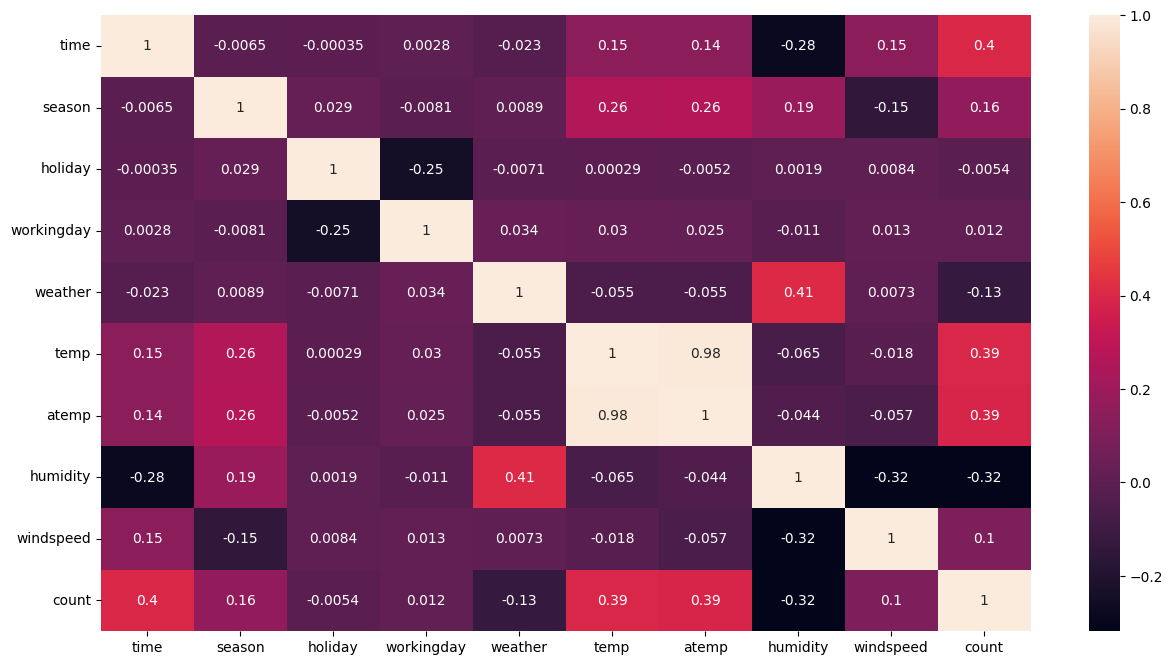

In [7]:
corr = train.iloc[:, 1:].corr()
plt.figure(figsize=(15,8))
sb.heatmap(data=corr, annot=True)

> ### Based on Hour of the Day

Text(0, 0.5, 'Count')

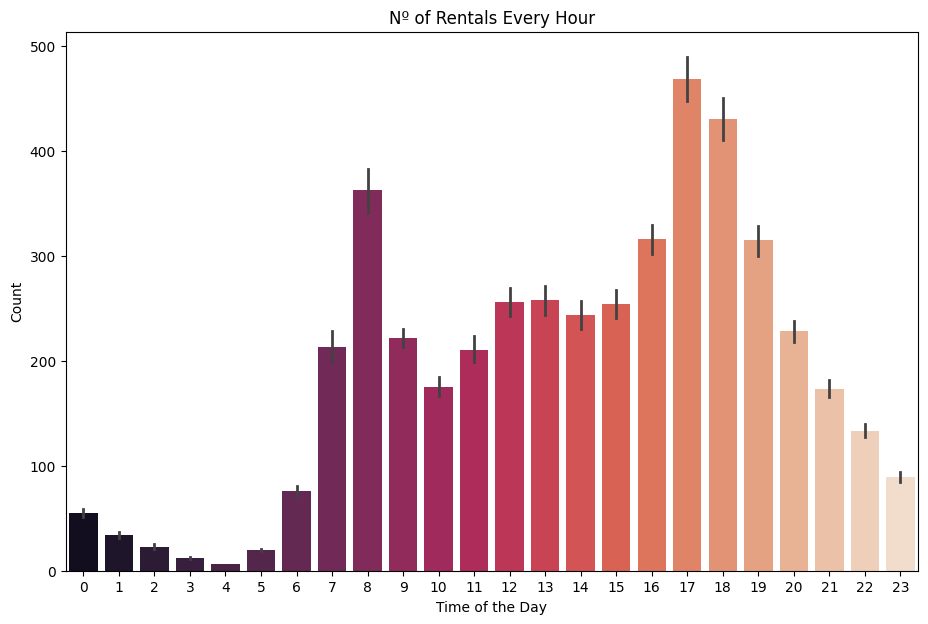

In [8]:
plt1 = plt.subplots(figsize=(11, 7))
plt1 = sb.barplot(x='time', y='count', data=train.iloc[:, [1,10]], palette = 'rocket', errwidth=2)
# plt1.bar_label(plt1.containers[0])
plt1.set_title('Nº of Rentals Every Hour')
plt1.set_xlabel('Time of the Day')
plt1.set_ylabel('Count')

> ### Based on Hour of the Day and on Working Days

Text(0, 0.5, 'Count')

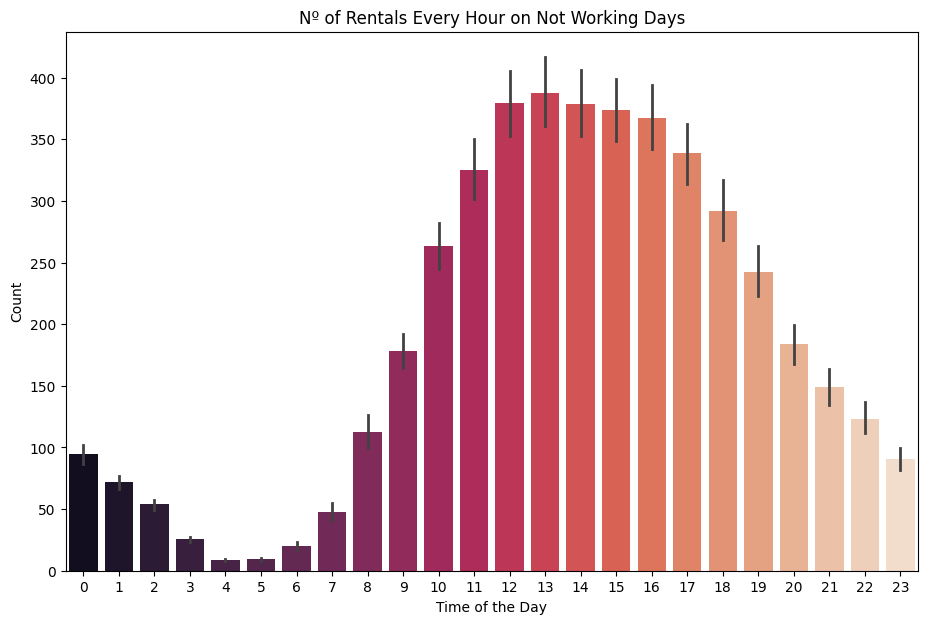

In [9]:
plt2 = plt.subplots(figsize=(11, 7))
plt2 = sb.barplot(x='time', y='count', data=train[train['workingday'] == 0].iloc[:, [1,4,10]], palette='rocket', errwidth=2)
# plt2.bar_label(plt2.containers[0])
plt2.set_title('Nº of Rentals Every Hour on Not Working Days')
plt2.set_xlabel('Time of the Day')
plt2.set_ylabel('Count')

Text(0, 0.5, 'Count')

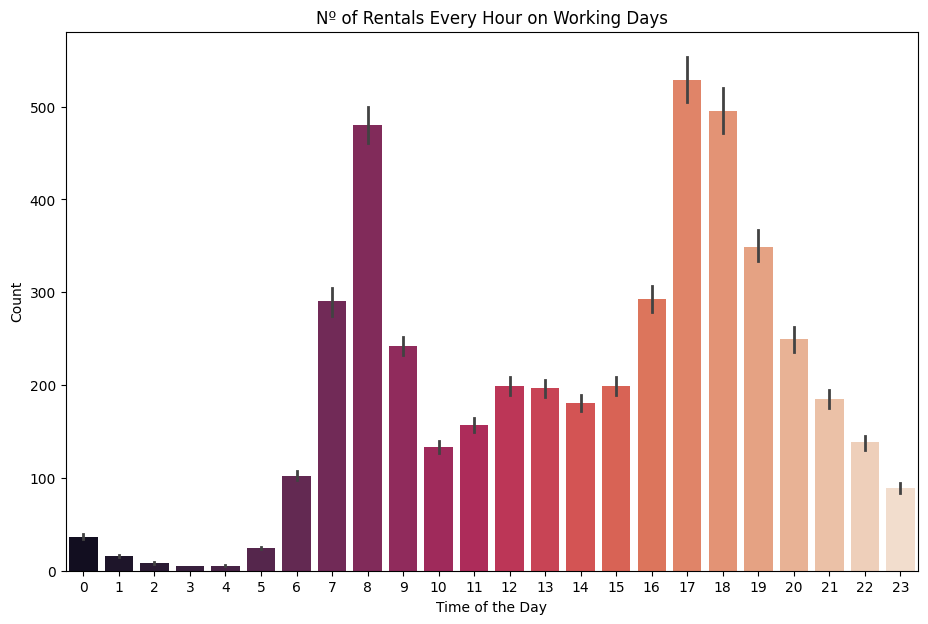

In [10]:
plt3 = plt.subplots(figsize=(11, 7))
plt3 = sb.barplot(x='time', y='count', data=train[train['workingday'] == 1].iloc[:, [1,3,4,10]], palette='rocket', errwidth=2)
# plt3.bar_label(plt3.containers[0])
plt3.set_title('Nº of Rentals Every Hour on Working Days')
plt3.set_xlabel('Time of the Day')
plt3.set_ylabel('Count')

> ### Based on Hour of the Day, on Working Days and Weather

Text(0, 0.5, 'Count')

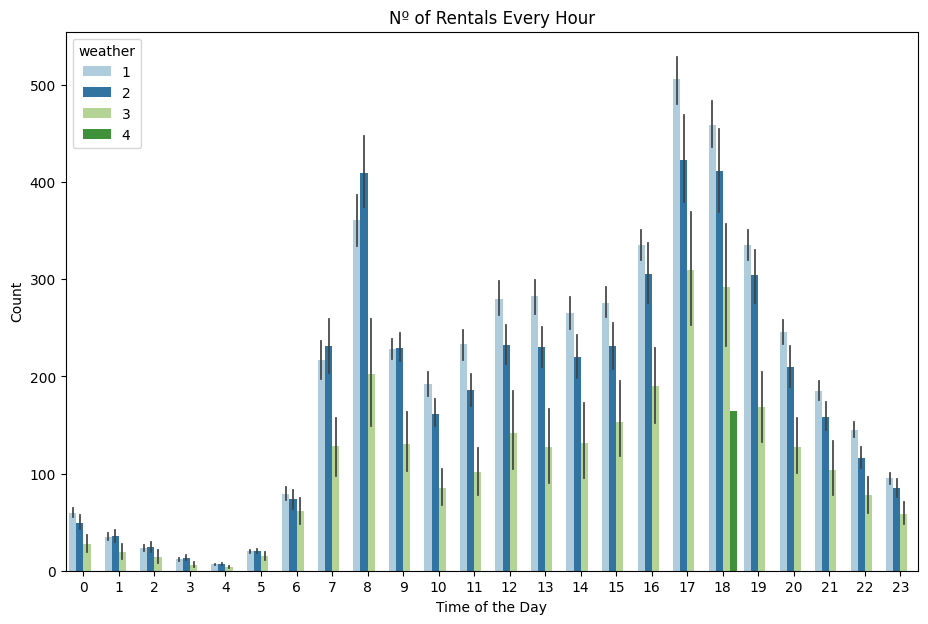

In [11]:
plt4 = plt.subplots(figsize=(11, 7))
plt4 = sb.barplot(x='time', y='count', data=train.iloc[:, [1,5,10]], palette='Paired', hue='weather', errwidth=1.25)
# plt4.bar_label(plt4.containers[0])
plt4.set_title('Nº of Rentals Every Hour')
plt4.set_xlabel('Time of the Day')
plt4.set_ylabel('Count')

Text(0, 0.5, 'Count')

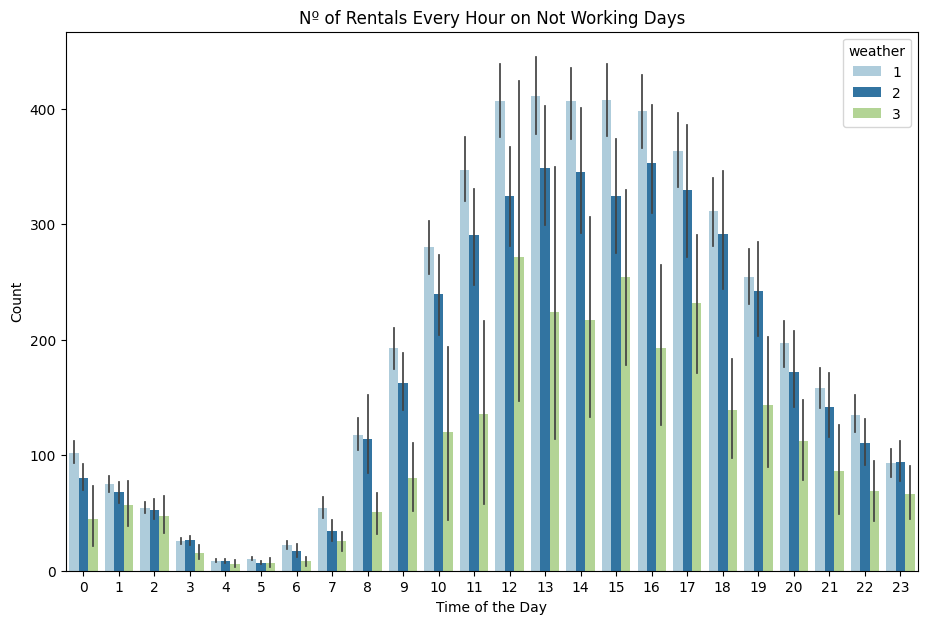

In [12]:
plt5 = plt.subplots(figsize=(11, 7))
plt5 = sb.barplot(x='time', y='count', data=train[train['workingday'] == 0].iloc[:, [1,5,10]], palette='Paired', hue='weather', errwidth=1.25)
# plt5.bar_label(plt5.containers[0])
plt5.set_title('Nº of Rentals Every Hour on Not Working Days')
plt5.set_xlabel('Time of the Day')
plt5.set_ylabel('Count')

Text(0, 0.5, 'Count')

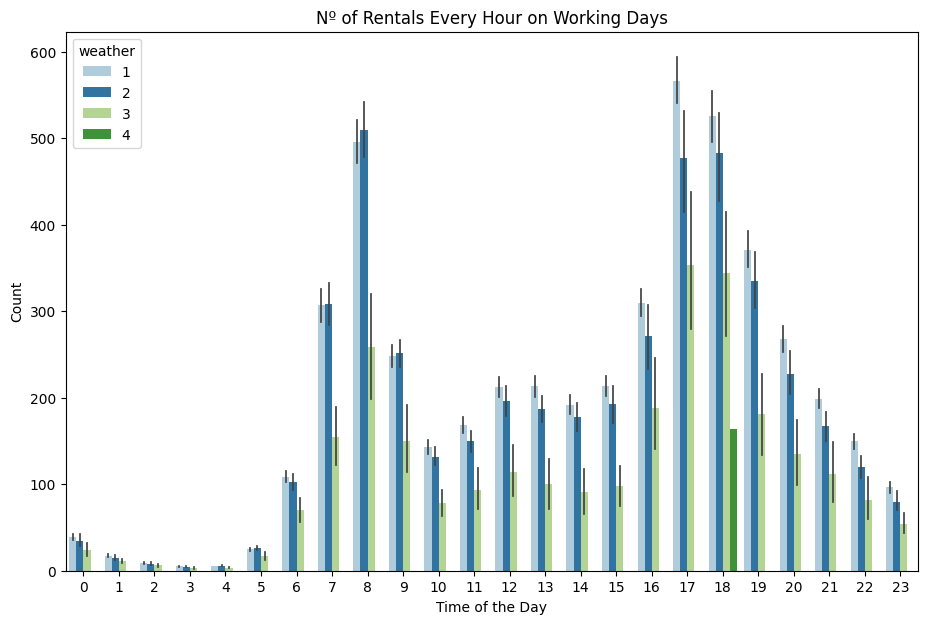

In [13]:
plt6 = plt.subplots(figsize=(11, 7))
plt6 = sb.barplot(x='time', y='count', data=train[train['workingday'] == 1].iloc[:, [1,5,10]], palette='Paired', hue='weather', errwidth=1.25)
# plt6.bar_label(plt6.containers[0])
plt6.set_title('Nº of Rentals Every Hour on Working Days')
plt6.set_xlabel('Time of the Day')
plt6.set_ylabel('Count')

> ### Based on Temperature

Text(0, 0.5, 'Count')

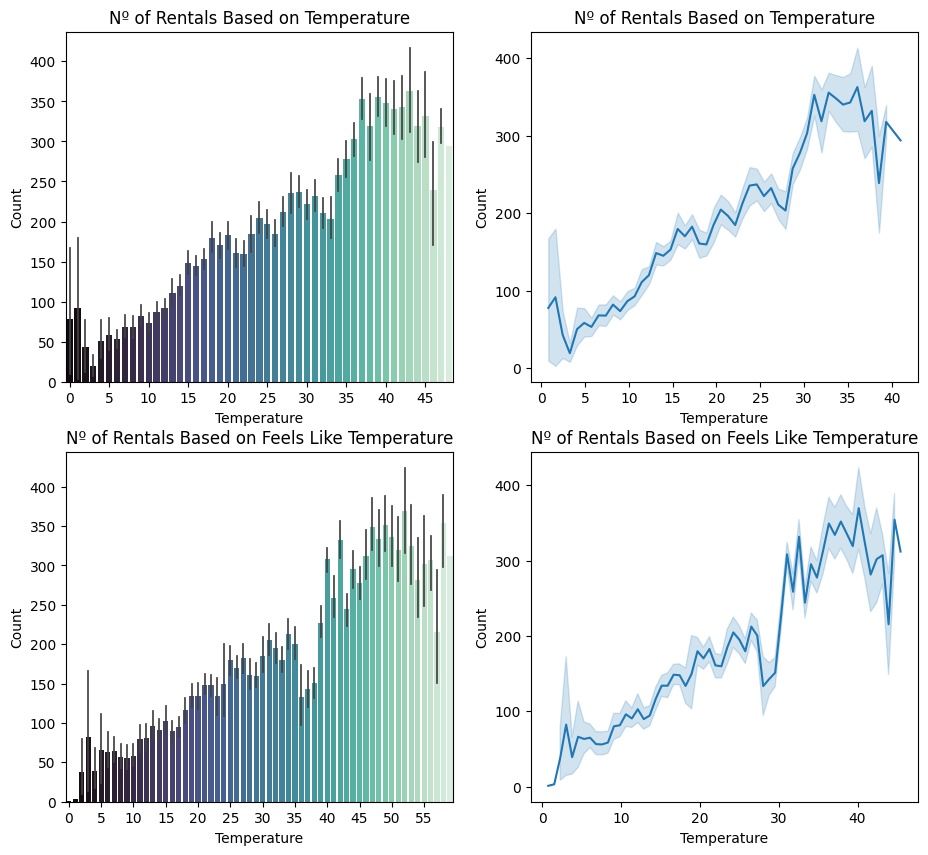

In [14]:
plt7, axes = plt.subplots(2, 2, figsize=(11, 10))

plt8 = sb.barplot(x='temp', y='count', data=train.iloc[:, [6,7,10]], palette='mako', errwidth=1.25, ax=axes[0,0])
plt8.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt8.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt8.set_title('Nº of Rentals Based on Temperature')
plt8.set_xlabel('Temperature')
plt8.set_ylabel('Count')

plt9 = sb.lineplot(x='temp', y='count', data=train.iloc[:, [6,7,10]], ax=axes[0,1])
plt9.set_title('Nº of Rentals Based on Temperature')
plt9.set_xlabel('Temperature')
plt9.set_ylabel('Count')

plt10 = sb.barplot(x='atemp', y='count', data=train.iloc[:, [6,7,10]], palette='mako', errwidth=1.25, ax=axes[1,0])
plt10.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt10.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt10.set_title('Nº of Rentals Based on Feels Like Temperature')
plt10.set_xlabel('Temperature')
plt10.set_ylabel('Count')

plt11 = sb.lineplot(x='atemp', y='count', data=train.iloc[:, [6,7,10]], ax=axes[1,1])
plt11.set_title('Nº of Rentals Based on Feels Like Temperature')
plt11.set_xlabel('Temperature')
plt11.set_ylabel('Count')

> ### Based on Humidity and Windspeed

Text(0, 0.5, 'Count')

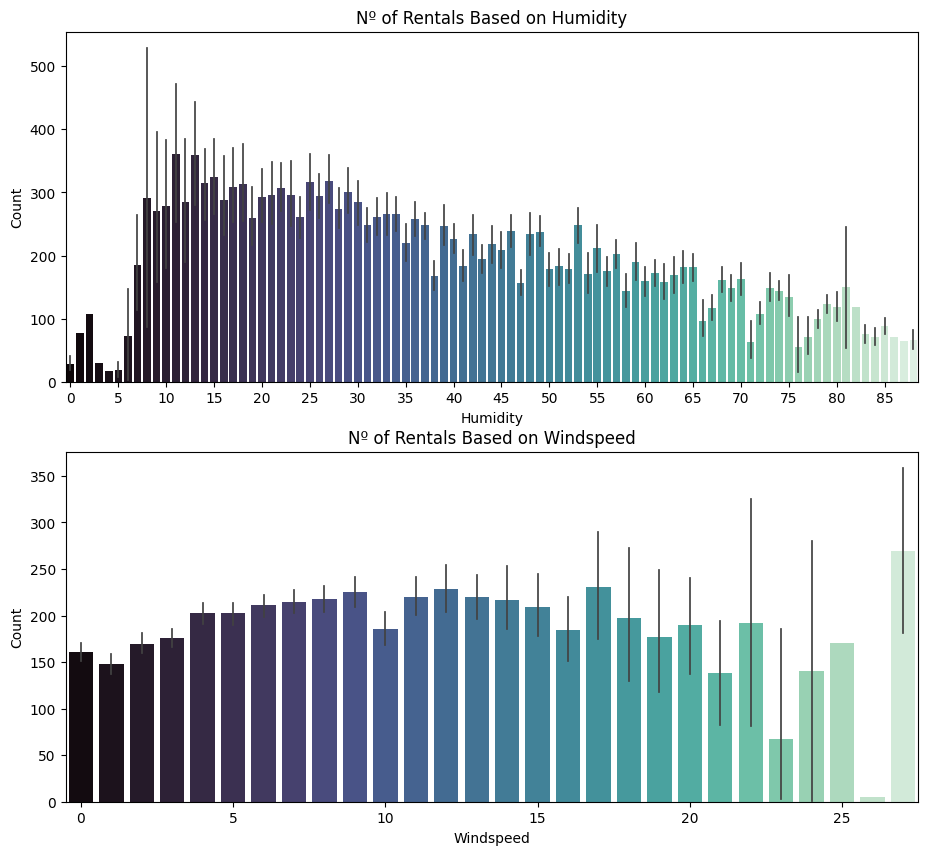

In [15]:
plt12, axes = plt.subplots(2, 1, figsize=(11, 10))

plt13 = sb.barplot(x='humidity', y='count', data=train.iloc[:, [8,10]], palette='mako', errwidth=1.25, ax=axes[0])
plt13.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt13.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt13.set_title('Nº of Rentals Based on Humidity')
plt13.set_xlabel('Humidity')
plt13.set_ylabel('Count')

plt14 = sb.barplot(x='windspeed', y='count', data=train.iloc[:, [9,10]], palette='mako', errwidth=1.25, ax=axes[1])
plt14.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt14.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt14.set_title('Nº of Rentals Based on Windspeed')
plt14.set_xlabel('Windspeed')
plt14.set_ylabel('Count')

In [38]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
temp_X_train = train.loc[:,'temp'].values.reshape(-1, 1)
train_Y = train.loc[:,'count'].values.reshape(-1, 1)
regr.fit(temp_X_train, train_Y)
y = regr.predict(test.loc[:, 'temp'].values.reshape(-1, 1))
test_Y_temp = pd.DataFrame(y)
test_Y_temp.apply(lambda x: round(x, 0), axis = 1).head()

,0
0,104.0
1,104.0
2,104.0
3,104.0
4,104.0
